In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
#Load the dataset
data= pd.read_csv(r'C:\Users\user\Downloads\Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#Check for missing values
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
Data= data.drop(['Id'], axis=1)
Data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


C:\Users\user\AppData\Local\Temp\ipykernel_13748\2229971677.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['SepalWidthCm'])


<Axes: xlabel='SepalWidthCm', ylabel='Density'>

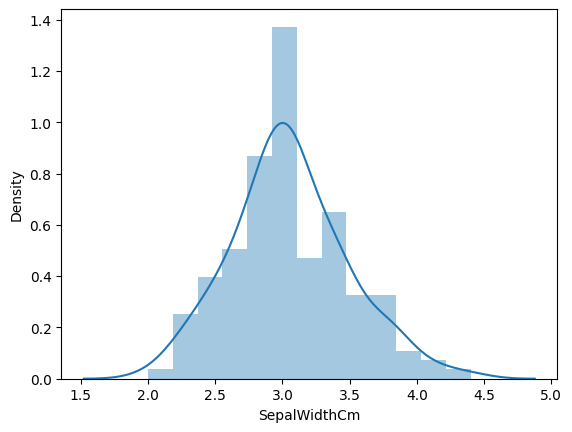

In [23]:
sns.distplot(Data['SepalWidthCm'])

In [27]:
data_dummy = Data.copy()
data_dummy

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
data_dummy['Species']= data_dummy['Species'].map({'Iris-setosa':0, 'Iris-virginica':1, 'Iris-versicolor':2})
data_dummy

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [29]:
#Declare inputs and targets
#iris_data=data_dummy.copy()
#targets= iris_data['Species']
#inputs= iris_data.drop(['Species'], axis= 1)

In [42]:
#Declare inputs and targets
iris_data=data_dummy.copy()
X= iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]#Features
y= iris_data['Species'] #Target

In [44]:
#SCALE THE DATA
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)

StandardScaler()

In [45]:
inputs_scaled= scaler.transform(X)
inputs_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [47]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 365) 
x_train, x_test, y_train, y_test

(     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 130            7.4           2.8            6.1           1.9
 13             4.3           3.0            1.1           0.1
 47             4.6           3.2            1.4           0.2
 88             5.6           3.0            4.1           1.3
 142            5.8           2.7            5.1           1.9
 ..             ...           ...            ...           ...
 73             6.1           2.8            4.7           1.2
 5              5.4           3.9            1.7           0.4
 91             6.1           3.0            4.6           1.4
 33             5.5           4.2            1.4           0.2
 82             5.8           2.7            3.9           1.2
 
 [105 rows x 4 columns],
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 32             5.2           4.1            1.5           0.1
 40             5.0           3.5            1.3           0.3
 4              5.0         

In [34]:
#Create the model (regression)
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [49]:
#Train a random Foresr Classifier
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(random_state=40)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=40)

In [50]:
#Make a prediction
y_hat = model.predict(x_train)
y_hat

array([1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2,
       1, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0,
       2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 0,
       2, 1, 0, 1, 0, 2, 1, 0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 2, 1, 0, 2, 2,
       1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2])

In [56]:
#Evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print('Classifiation Report:\n', classification_report(y_train, y_hat))
print('Accuracy Score:', accuracy_score(y_train, y_hat))
print

Classifiation Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        33

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

Accuracy Score: 1.0


<function print(*args, sep=' ', end='\n', file=None, flush=False)>